In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('twentyeleven.csv').drop_duplicates(ignore_index = True).dropna(axis = 0, how = 'any', subset = 'Description')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04T10:00:00Z,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
3,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04T10:00:00Z,2.10,13313.0,United Kingdom,2011-01-04,10.5,2011
4,539993.0,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04T10:00:00Z,1.25,13313.0,United Kingdom,2011-01-04,12.5,2011


In [3]:
df_grouped = df.groupby(by = 'StockCode').agg(quantity = ('Quantity', 'sum'), revenue = ('revenue', 'sum')).reset_index()

In [4]:
df_grouped.head()

,StockCode,quantity,revenue
0,10002,609,525.48
1,10080,325,119.09
2,10120,176,36.96
3,10123C,4,2.60
4,10124A,12,5.04


In [5]:
import inventorize3 as inv

In [6]:
abc_class = inv.productmix(df_grouped['StockCode'], df_grouped['quantity'], df_grouped['revenue'])

In [7]:
abc_class

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
3820,DOT,654,181577.580,1.282843e-04,0.923597,1.896367e-02,0.018964,B,A,B_A
1278,22423,11775,146461.780,2.309706e-03,0.206799,1.529623e-02,0.034260,A,A,A_A
2622,47566,18050,98237.490,3.540568e-03,0.102480,1.025977e-02,0.044520,A,A,A_A
3332,85123A,37892,94027.390,7.432643e-03,0.036883,9.820069e-03,0.054340,A,A,A_A
3314,85099B,46223,90140.660,9.066796e-03,0.029450,9.414146e-03,0.063754,A,A,A_A
...,...,...,...,...,...,...,...,...,...,...
2871,84227,1,0.420,1.961534e-07,0.999986,4.386412e-08,1.000000,C,C,C_C
3822,PADS,4,0.003,7.846134e-07,0.999909,3.133152e-10,1.000000,C,C,C_C
2452,35600A,1,0.000,1.961534e-07,0.999992,0.000000e+00,1.000000,C,C,C_C
2376,23595,5,0.000,9.807668e-07,0.999892,0.000000e+00,1.000000,C,C,C_C


In [8]:
abc_class[['product_mix']].value_counts().reset_index()

,product_mix,count
0,C_C,1746
1,A_A,558
2,B_B,391
3,C_B,287
4,A_B,281
5,B_C,274
6,B_A,198
7,C_A,48
8,A_C,47


In [9]:
import seaborn as sns

<Axes: xlabel='product_mix', ylabel='count'>

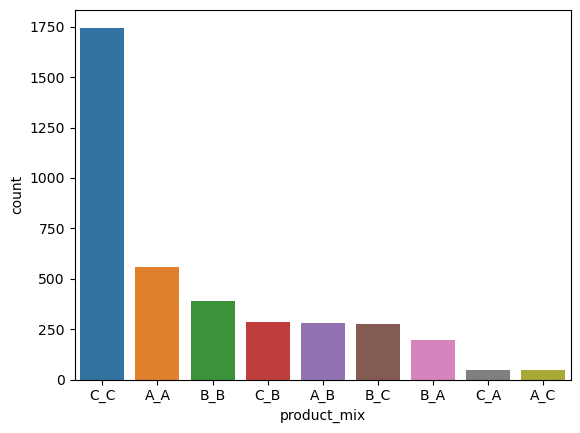

In [10]:
sns.barplot(data = abc_class[['product_mix']].value_counts().reset_index(), x = 'product_mix', y = 'count')

<Axes: xlabel='product_mix', ylabel='count'>

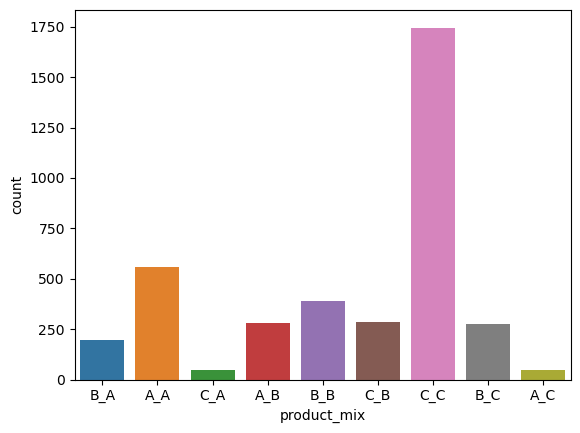

In [11]:
sns.countplot(data = abc_class, x = 'product_mix')

In [12]:
df_grouped_country = df.groupby(by = ['StockCode', 'Country']).agg(quantity = ('Quantity', 'sum'), revenue = ('revenue', 'sum')).reset_index()

In [13]:
df_grouped_country

,StockCode,Country,quantity,revenue
0,10002,France,276,234.60
1,10002,Germany,1,0.85
2,10002,Japan,1,0.85
3,10002,Spain,24,20.40
4,10002,Switzerland,12,10.20
...,...,...,...,...
19088,gift_0001_10,United Kingdom,9,74.97
19089,gift_0001_20,United Kingdom,20,167.05
19090,gift_0001_30,United Kingdom,7,175.53
19091,gift_0001_40,United Kingdom,2,66.66


In [14]:
abc_class_country = inv.productmix_storelevel(df_grouped_country['StockCode'], df_grouped_country['quantity'], df_grouped_country['revenue'], df_grouped_country['Country'])

C:\Users\thanh\anaconda3\Lib\site-packages\inventorize3\__init__.py:1102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['sales_mix']= store['sales']/sum(store['sales'])
C:\Users\thanh\anaconda3\Lib\site-packages\inventorize3\__init__.py:1102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['sales_mix']= store['sales']/sum(store['sales'])
C:\Users\thanh\anaconda3\Lib\site-packages\inventorize3\__init__.py:1102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [15]:
abc_class_country.head()

,sku,sales,revenue,storeofsku,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
19072,POST,774,14536.00,France,0.007229,0.178999,0.072670,0.072670,A,A,A_A
19053,M,7,9492.37,France,0.000065,0.989138,0.047455,0.120126,C,A,C_A
11997,23084,4024,7277.20,France,0.037582,0.037582,0.036381,0.156507,A,A,A_A
7042,22423,237,2791.35,France,0.002213,0.502452,0.013955,0.170462,A,A,A_A
3596,21731,1123,1852.95,France,0.010488,0.089985,0.009263,0.179725,A,A,A_A


In [16]:
abc_class_country[abc_class_country['storeofsku'] == 'EIRE']['product_mix'].value_counts()

product_mix
C_C    551
A_A    315
B_B    282
B_C    241
C_B    221
A_B    154
B_A    106
A_C     40
C_A     20
Name: count, dtype: int64

<Axes: xlabel='product_mix', ylabel='count'>

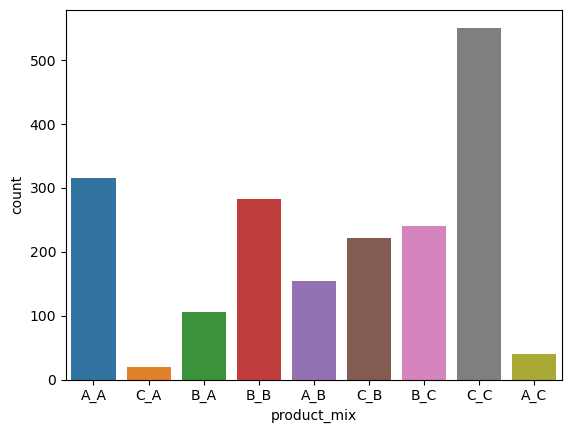

In [17]:
sns.countplot(data = abc_class_country[abc_class_country['storeofsku'] == 'EIRE'][['product_mix']], x = 'product_mix')